# ***1. Data Science Project - Predicting House Prices Using Linear Regression ***
- Developed a predictive model using
linear regression to estimate house prices based on features like size and number of bedrooms, aiding in real estate
market value assessment.

Scatter Plot

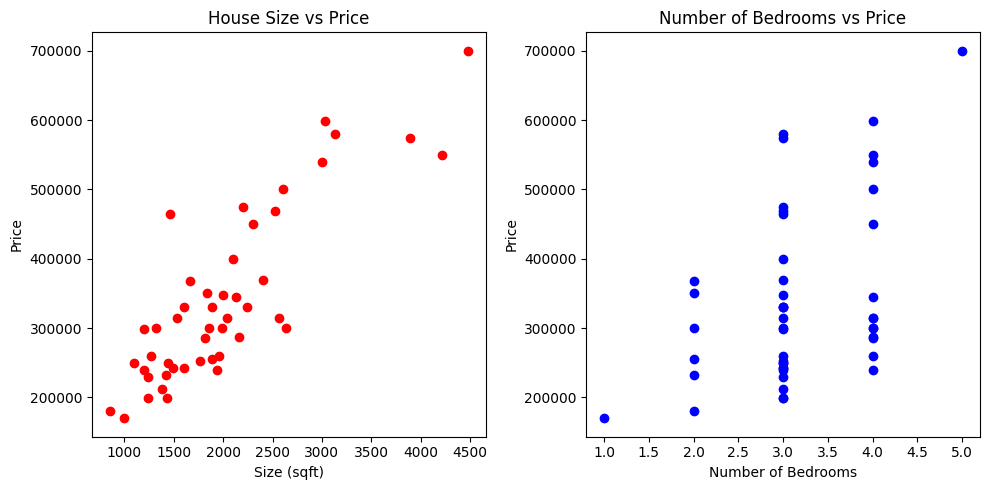

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.loadtxt('/content/HousePrices.txt', delimiter=',')
X = data[:, 0:2]  # Features: size and number of bedrooms
y = data[:, 2]    # Target: price

# Plot the scatter plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], y, color='red')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('House Size vs Price')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y, color='blue')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Number of Bedrooms vs Price')

plt.tight_layout()
plt.show()

Compute the Cost Function and Gradient of the Cost Function

In [2]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

Optimal Parameters by Implementing Gradient Descent

In [3]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        theta = theta - (1/m) * learning_rate * (X.T.dot(X.dot(theta) - y))
        cost_history[i] = compute_cost(X, y, theta)

        # Print cost for every 100 iterations
        if i % 100 == 0:
            print(f'Cost at iteration {i}: {cost_history[i]}')

    return theta, cost_history

# Feature normalization
X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_norm = np.hstack([np.ones((X.shape[0], 1)), X_norm])  # Add intercept term

# Initialize parameters
theta = np.zeros(X_norm.shape[1])
learning_rate = 0.01
iterations = 1500

# Perform gradient descent
theta, cost_history = gradient_descent(X_norm, y, theta, learning_rate, iterations)

print(f'Optimal parameters: {theta}')

Cost at iteration 0: 64297776251.6201
Cost at iteration 100: 10431601126.161713
Cost at iteration 200: 3321607823.085977
Cost at iteration 300: 2284298697.5320024
Cost at iteration 400: 2104694472.8934014
Cost at iteration 500: 2063574541.0378187
Cost at iteration 600: 2050994383.00516
Cost at iteration 700: 2046381437.0218444
Cost at iteration 800: 2044551551.549998
Cost at iteration 900: 2043804738.9887838
Cost at iteration 1000: 2043497024.739187
Cost at iteration 1100: 2043369837.640095
Cost at iteration 1200: 2043317214.0700338
Cost at iteration 1300: 2043295433.9267344
Cost at iteration 1400: 2043286418.474456
Optimal parameters: [340412.56301439 109370.05670466  -6500.61509507]


Price Prediction

In [4]:
def predict(size, bedrooms, theta, X_mean, X_std):
    x = np.array([1, (size - X_mean[0]) / X_std[0], (bedrooms - X_mean[1]) / X_std[1]])
    return x.dot(theta)

# Example prediction
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

predicted_price = predict(2100, 3, theta, X_mean, X_std)
print(f'Predicted price for a house with 2100 sqft and 3 bedrooms: ${predicted_price:.2f}')

Predicted price for a house with 2100 sqft and 3 bedrooms: $355698.77
